In [1]:
from bs4 import BeautifulSoup as bs

In [2]:
import requests

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

Web scraping hardware (game platforms) sales data from VGChartz.com

In [7]:
r = requests.get('https://www.vgchartz.com/analysis/platform_totals/Hardware/Global/')

In [8]:
vg_sales = bs(r.content, 'lxml')

In [9]:
table = vg_sales.find("table", { "id" : "myTable" })

In [10]:
bs(table.text)

<html><body><p>Pos
Platform
North America
Europe
Japan
Rest of World
Global




1
PlayStation 2 (PS2)
53.65
55.28
23.18
25.57
157.68


2
Nintendo DS (DS)
57.39
52.07
33.01
12.43
154.90


3
Game Boy (GB)
43.18
40.05
32.47
2.99
118.69


4
PlayStation 4 (PS4)
38.14
48.09
9.36
19.99
115.58


5
PlayStation (PS)
40.78
31.09
21.59
9.04
102.50


6
Wii (Wii)
45.51
33.88
12.77
9.48
101.64


7
PlayStation 3 (PS3)
29.42
34.99
10.47
12.53
87.41


8
Xbox 360 (X360)
49.11
25.87
1.66
9.16
85.80


9
Nintendo Switch (NS)
32.14
22.21
19.92
11.43
85.70


10
Game Boy Advance (GBA)
40.39
21.31
16.96
2.85
81.51


11
PlayStation Portable (PSP)
21.41
24.41
20.01
15.26
81.09


12
Nintendo 3DS (3DS)
25.77
21.07
24.65
4.44
75.93


13
Nintendo Entertainment System (NES)
33.49
8.30
19.35
0.77
61.91


14
Xbox One (XOne)
32.13
12.39
0.12
5.46
50.10


15
Super Nintendo Entertainment System (SNES)
22.88
8.15
17.17
0.90
49.10


16
Nintendo 64 (N64)
20.11
6.35
5.54
0.93
32.93


17
Sega Genesis (GEN)
16.98
8.39
3.58
0.59


In [11]:
table_body = table.find('tbody')

In [12]:
data = []

In [13]:
rows = table_body.find_all('tr')

In [14]:
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele]) # Get rid of empty values

In [15]:
df = pd.DataFrame(data)

In [16]:
df.to_csv('console_sales.csv') # Saving the scraped data to a CSV file.

In [17]:
console_sales = pd.read_csv('console_sales.csv')

In [18]:
console_sales.head()

,Unnamed: 0,0,1,2,3,4,5,6
0,0,1,PlayStation 2 (PS2),53.65,55.28,23.18,25.57,157.68
1,1,2,Nintendo DS (DS),57.39,52.07,33.01,12.43,154.90
2,2,3,Game Boy (GB),43.18,40.05,32.47,2.99,118.69
3,3,4,PlayStation 4 (PS4),38.14,48.09,9.36,19.99,115.58
4,4,5,PlayStation (PS),40.78,31.09,21.59,9.04,102.50


Dropping unnecessary columns and renaming the columns

In [19]:
del(console_sales["Unnamed: 0"])

In [20]:
del(console_sales["0"])

In [21]:
console_sales.head()

,1,2,3,4,5,6
0,PlayStation 2 (PS2),53.65,55.28,23.18,25.57,157.68
1,Nintendo DS (DS),57.39,52.07,33.01,12.43,154.90
2,Game Boy (GB),43.18,40.05,32.47,2.99,118.69
3,PlayStation 4 (PS4),38.14,48.09,9.36,19.99,115.58
4,PlayStation (PS),40.78,31.09,21.59,9.04,102.50


In [22]:
console_sales.columns = ['Platform', 'North America', 'Europe', 'Japan', 'Rest of World', 'Global']

Setting the gaming platforms as the index

In [23]:
console_sales = console_sales.set_index("Platform")

In [24]:
console_sales.head()

,North America,Europe,Japan,Rest of World,Global
Platform,,,,,
PlayStation 2 (PS2),53.65,55.28,23.18,25.57,157.68
Nintendo DS (DS),57.39,52.07,33.01,12.43,154.90
Game Boy (GB),43.18,40.05,32.47,2.99,118.69
PlayStation 4 (PS4),38.14,48.09,9.36,19.99,115.58
PlayStation (PS),40.78,31.09,21.59,9.04,102.50


Exploring above dataset

In [25]:
print(console_sales.describe())

       North America     Europe      Japan  Rest of World      Global
count      36.000000  36.000000  36.000000      36.000000   36.000000
mean       19.031111  13.562500   8.260000       4.222222   45.075833
std        18.294966  16.565696  10.093689       6.374593   47.422795
min         0.000000   0.000000   0.000000       0.000000    0.000000
25%         2.437500   0.840000   0.037500       0.052500    4.832500
50%        16.375000   5.795000   3.455000       0.885000   26.145000
75%        32.477500  22.760000  17.012500       6.355000   82.557500
max        57.390000  55.280000  33.010000      25.570000  157.680000


In [26]:
print(console_sales.info())

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, PlayStation 2 (PS2) to TurboGrafx-16 (TG16)
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   North America  36 non-null     float64
 1   Europe         36 non-null     float64
 2   Japan          36 non-null     float64
 3   Rest of World  36 non-null     float64
 4   Global         36 non-null     float64
dtypes: float64(5)
memory usage: 1.7+ KB
None


In [27]:
console_sales.shape

(36, 5)

Loading the dataset for video game sales 2020 from Kaggle.

In [28]:
vgsales = pd.read_csv("vgchartz-7_7_2020.csv")

In [29]:
vgsales.head()

,Unnamed: 0,img,title,console,genre,publisher,developer,vg_score,critic_score,user_score,total_shipped,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,3,/games/boxart/full_3351915AmericaFrontccc.jpg,Warriors,Series,Action,Unknown,Omega Force,NaN,NaN,NaN,42.06,NaN,NaN,NaN,NaN,NaN,NaN,24/03/2020
1,4,/games/boxart/full_5741036AmericaFrontccc.jpg,God of War,Series,Action,Sony Computer Entertainment,SIE Santa Monica Studio|Ready at Dawn|Javagrou...,NaN,NaN,NaN,35.05,NaN,NaN,NaN,NaN,NaN,22/03/2005,04/03/2020
2,5,/games/boxart/full_6662824AmericaFrontccc.png,Devil May Cry,Series,Action,Capcom,Capcom|Ninja Theory,NaN,NaN,NaN,22.00,NaN,NaN,NaN,NaN,NaN,16/10/2001,03/02/2020
3,6,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,NaN,9.4,NaN,NaN,20.32,6.37,0.99,9.85,3.12,17/09/2013,NaN
4,7,/games/boxart/full_6800951AmericaFrontccc.jpg,Frogger,Series,Action,Konami,Konami|Parker Brothers|SCE Cambridge Studio|Bl...,NaN,NaN,NaN,20.00,NaN,NaN,NaN,NaN,NaN,23/10/1981,26/02/2020


Renaming the columns

In [30]:
vgsales.columns = ["Unused", "img", "Name", "Platform", "Genre", "Publisher", "Developer", "VG_Score", "Critic_Score", "User_Score", "Total_Shipped", "Total_Sales", "NA_Sales", "JP_Sales", "EU_Sales", "Other_Sales", "Release_Date", "Last_Update"]

Define a custom function

In [31]:
def cust_func():
    print("There are " + str(vgsales.shape[0]) + " rows and " + str(vgsales.shape[1]) + " columns.")
    return vgsales.shape

In [32]:
print(cust_func())

There are 57950 rows and 18 columns.
(57950, 18)


In [33]:
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57950 entries, 0 to 57949
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unused         57950 non-null  int64  
 1   img            57950 non-null  object 
 2   Name           57950 non-null  object 
 3   Platform       57950 non-null  object 
 4   Genre          57950 non-null  object 
 5   Publisher      57950 non-null  object 
 6   Developer      57933 non-null  object 
 7   VG_Score       984 non-null    float64
 8   Critic_Score   6544 non-null   float64
 9   User_Score     386 non-null    float64
 10  Total_Shipped  2373 non-null   float64
 11  Total_Sales    19319 non-null  float64
 12  NA_Sales       12900 non-null  float64
 13  JP_Sales       6993 non-null   float64
 14  EU_Sales       13111 non-null  float64
 15  Other_Sales    15440 non-null  float64
 16  Release_Date   54296 non-null  object 
 17  Last_Update    11763 non-null  object 
dtypes: flo

In [34]:
vgsales["Platform"].unique()

array(['Series', 'PS3', 'PS4', 'PS2', 'X360', 'PC', 'XOne', 'PSP', 'PS',
       'Wii', 'DS', '3DS', 'NES', 'GC', 'WiiU', 'XB', 'N64', 'GEN',
       '2600', 'GBA', 'GB', 'PSV', 'SNES', 'DC', 'NS', 'SAT', 'XBL',
       'PSN', 'And', 'DSiW', 'OSX', 'Lynx', 'SCD', 'Linux', 'MS', 'WW',
       'ZXS', 'ACPC', 'Amig', '7800', 'VC', 'GG', 'DSi', 'PCE', '5200',
       'AJ', 'WinP', 'Mob', 'iQue', 'iOS', 'WS', 'NG', 'GIZ', '3DO', 'VB',
       'GBC', 'Ouya', 'NGage', 'AST', 'MSD', 'S32X', 'PCFX', 'Int', 'XSX',
       'PS5', 'C128', 'CDi', 'CD32', 'Arc', 'C64', 'BRW', 'FMT', 'MSX',
       'BBCM', 'ApII', 'Aco', 'TG16'], dtype=object)

Subsetting data on popular platforms released from 2000-2020 only

In [35]:
vgsales = vgsales.set_index(["Platform"])

In [36]:
vgsales = vgsales.loc[["PS2", "PS3", "PS4", "PS5", "PSP", "PSV", "PSN", "GC", "XB", "XBL", "X360", "XOne", "XSX", "DS", "3DS", "NS", "Wii", "WiiU"]]

Slicing dataset and replace missing values

In [37]:
vgsales = vgsales.loc[:, "Name":"Release_Date"]

In [38]:
del(vgsales["Total_Shipped"])

In [39]:
del(vgsales["VG_Score"])

In [40]:
del(vgsales["Developer"])

In [41]:
vgsales.head()

,Name,Genre,Publisher,Critic_Score,User_Score,Total_Sales,NA_Sales,JP_Sales,EU_Sales,Other_Sales,Release_Date
Platform,,,,,,,,,,,
PS2,Grand Theft Auto: San Andreas,Action,Rockstar Games,9.5,NaN,NaN,NaN,NaN,NaN,NaN,26/10/2004
PS2,Grand Theft Auto: Vice City,Action,Rockstar Games,9.6,NaN,16.15,8.41,0.47,5.49,1.78,28/10/2002
PS2,Grand Theft Auto III,Action,Rockstar Games,9.5,NaN,13.10,6.99,0.30,4.51,1.30,23/10/2001
PS2,Metal Gear Solid 2: Sons of Liberty,Action,Konami,9.5,7.0,6.05,2.45,0.87,2.01,0.72,12/11/2001
PS2,The Lord of the Rings: The Two Towers,Action,Electronic Arts,8.3,NaN,4.67,1.94,0.08,1.95,0.70,21/10/2002


In [42]:
print(cust_func())

There are 27615 rows and 11 columns.
(27615, 11)


Checking for and filling in missing values

In [43]:
vgsales.isna().sum()

Name                0
Genre               0
Publisher           0
Critic_Score    23272
User_Score      27298
Total_Sales     13006
NA_Sales        17353
JP_Sales        21775
EU_Sales        18264
Other_Sales     16446
Release_Date     1775
dtype: int64

Make a bar chart on missing values

<AxesSubplot:>

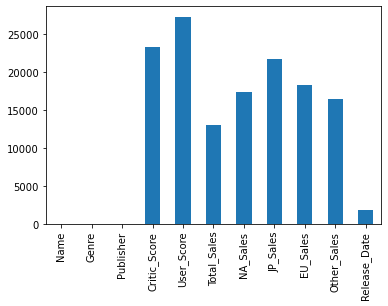

In [44]:
vgsales.isna().sum().plot(kind="bar")

In [45]:
vgsales_final = vgsales.dropna(subset=["Release_Date"])

In [46]:
vgsales_final = vgsales_final.drop_duplicates()

In [47]:
vgsales_final.mean()

Critic_Score    7.200694
User_Score      8.259804
Total_Sales     0.384281
NA_Sales        0.276100
JP_Sales        0.079972
EU_Sales        0.175754
Other_Sales     0.056413
dtype: float64

In [48]:
vgsales_final = vgsales_final.fillna({"Critic_Score":7.2, "User_Score":8.3, "NA_Sales":0.3, "JP_Sales":0.1, "EU_Sales":0.2, "Other_Sales":0.1})

In [49]:
vgsales_final.isna().sum()

Name                0
Genre               0
Publisher           0
Critic_Score        0
User_Score          0
Total_Sales     10203
NA_Sales            0
JP_Sales            0
EU_Sales            0
Other_Sales         0
Release_Date        0
dtype: int64

In [50]:
vgsales_final.head()

,Name,Genre,Publisher,Critic_Score,User_Score,Total_Sales,NA_Sales,JP_Sales,EU_Sales,Other_Sales,Release_Date
Platform,,,,,,,,,,,
PS2,Grand Theft Auto: San Andreas,Action,Rockstar Games,9.5,8.3,NaN,0.30,0.10,0.20,0.10,26/10/2004
PS2,Grand Theft Auto: Vice City,Action,Rockstar Games,9.6,8.3,16.15,8.41,0.47,5.49,1.78,28/10/2002
PS2,Grand Theft Auto III,Action,Rockstar Games,9.5,8.3,13.10,6.99,0.30,4.51,1.30,23/10/2001
PS2,Metal Gear Solid 2: Sons of Liberty,Action,Konami,9.5,7.0,6.05,2.45,0.87,2.01,0.72,12/11/2001
PS2,The Lord of the Rings: The Two Towers,Action,Electronic Arts,8.3,8.3,4.67,1.94,0.08,1.95,0.70,21/10/2002


In [51]:
vgsales_final = vgsales_final.reset_index()

In [52]:
vgsales_final.head()

,Platform,Name,Genre,Publisher,Critic_Score,User_Score,Total_Sales,NA_Sales,JP_Sales,EU_Sales,Other_Sales,Release_Date
0,PS2,Grand Theft Auto: San Andreas,Action,Rockstar Games,9.5,8.3,NaN,0.30,0.10,0.20,0.10,26/10/2004
1,PS2,Grand Theft Auto: Vice City,Action,Rockstar Games,9.6,8.3,16.15,8.41,0.47,5.49,1.78,28/10/2002
2,PS2,Grand Theft Auto III,Action,Rockstar Games,9.5,8.3,13.10,6.99,0.30,4.51,1.30,23/10/2001
3,PS2,Metal Gear Solid 2: Sons of Liberty,Action,Konami,9.5,7.0,6.05,2.45,0.87,2.01,0.72,12/11/2001
4,PS2,The Lord of the Rings: The Two Towers,Action,Electronic Arts,8.3,8.3,4.67,1.94,0.08,1.95,0.70,21/10/2002


In [53]:
vgsales_final.shape

(24601, 12)

Loading third dataset for merging with second dataset

In [54]:
games_sales = pd.read_csv("Video_Games.csv")

In [55]:
games_sales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
games_sales.shape

(16719, 16)

In [57]:
games_sales["Rating"].isna().sum()

6769

In [58]:
games_sales = games_sales.dropna(subset=["Rating"])

In [59]:
games_sales = games_sales.drop_duplicates()

In [60]:
games_sales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [61]:
games_sales = games_sales[["Name", "Platform", "Rating"]]

In [62]:
games_sales.head()

,Name,Platform,Rating
0,Wii Sports,Wii,E
2,Mario Kart Wii,Wii,E
3,Wii Sports Resort,Wii,E
6,New Super Mario Bros.,DS,E
7,Wii Play,Wii,E


In [63]:
games_sales.shape

(9950, 3)

Merging DataFrames

In [64]:
vgsales_merged = vgsales_final.merge(games_sales, on=['Platform', 'Name'], how='left')

In [65]:
vgsales_merged.head()

,Platform,Name,Genre,Publisher,Critic_Score,User_Score,Total_Sales,NA_Sales,JP_Sales,EU_Sales,Other_Sales,Release_Date,Rating
0,PS2,Grand Theft Auto: San Andreas,Action,Rockstar Games,9.5,8.3,NaN,0.30,0.10,0.20,0.10,26/10/2004,M
1,PS2,Grand Theft Auto: Vice City,Action,Rockstar Games,9.6,8.3,16.15,8.41,0.47,5.49,1.78,28/10/2002,M
2,PS2,Grand Theft Auto III,Action,Rockstar Games,9.5,8.3,13.10,6.99,0.30,4.51,1.30,23/10/2001,M
3,PS2,Metal Gear Solid 2: Sons of Liberty,Action,Konami,9.5,7.0,6.05,2.45,0.87,2.01,0.72,12/11/2001,M
4,PS2,The Lord of the Rings: The Two Towers,Action,Electronic Arts,8.3,8.3,4.67,1.94,0.08,1.95,0.70,21/10/2002,T


In [66]:
vgsales_merged.shape

(24603, 13)

In [67]:
vgsales_merged.isna().sum()

Platform            0
Name                0
Genre               0
Publisher           0
Critic_Score        0
User_Score          0
Total_Sales     10203
NA_Sales            0
JP_Sales            0
EU_Sales            0
Other_Sales         0
Release_Date        0
Rating          16422
dtype: int64

In [68]:
vgsales_merged["Rating"].fillna("Unknown", inplace=True)

In [69]:
vgsales_merged = vgsales_merged.set_index("Name")

In [70]:
vgsales_merged.head()

,Platform,Genre,Publisher,Critic_Score,User_Score,Total_Sales,NA_Sales,JP_Sales,EU_Sales,Other_Sales,Release_Date,Rating
Name,,,,,,,,,,,,
Grand Theft Auto: San Andreas,PS2,Action,Rockstar Games,9.5,8.3,NaN,0.30,0.10,0.20,0.10,26/10/2004,M
Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,9.6,8.3,16.15,8.41,0.47,5.49,1.78,28/10/2002,M
Grand Theft Auto III,PS2,Action,Rockstar Games,9.5,8.3,13.10,6.99,0.30,4.51,1.30,23/10/2001,M
Metal Gear Solid 2: Sons of Liberty,PS2,Action,Konami,9.5,7.0,6.05,2.45,0.87,2.01,0.72,12/11/2001,M
The Lord of the Rings: The Two Towers,PS2,Action,Electronic Arts,8.3,8.3,4.67,1.94,0.08,1.95,0.70,21/10/2002,T


In [71]:
vgsales_merged["Total_Sales"] = vgsales_merged["NA_Sales"] + vgsales_merged["JP_Sales"] + vgsales_merged["EU_Sales"] + vgsales_merged["Other_Sales"]

In [72]:
vgsales_merged.isna().sum()

Platform        0
Genre           0
Publisher       0
Critic_Score    0
User_Score      0
Total_Sales     0
NA_Sales        0
JP_Sales        0
EU_Sales        0
Other_Sales     0
Release_Date    0
Rating          0
dtype: int64

In [73]:
vgsales_merged.head()

,Platform,Genre,Publisher,Critic_Score,User_Score,Total_Sales,NA_Sales,JP_Sales,EU_Sales,Other_Sales,Release_Date,Rating
Name,,,,,,,,,,,,
Grand Theft Auto: San Andreas,PS2,Action,Rockstar Games,9.5,8.3,0.70,0.30,0.10,0.20,0.10,26/10/2004,M
Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,9.6,8.3,16.15,8.41,0.47,5.49,1.78,28/10/2002,M
Grand Theft Auto III,PS2,Action,Rockstar Games,9.5,8.3,13.10,6.99,0.30,4.51,1.30,23/10/2001,M
Metal Gear Solid 2: Sons of Liberty,PS2,Action,Konami,9.5,7.0,6.05,2.45,0.87,2.01,0.72,12/11/2001,M
The Lord of the Rings: The Two Towers,PS2,Action,Electronic Arts,8.3,8.3,4.67,1.94,0.08,1.95,0.70,21/10/2002,T


Converting Release Date column from an object to datetime format, so sorting the dates will be easier and more accurate.

In [74]:
vgsales_merged["Release_Date"] = pd.to_datetime(vgsales_merged["Release_Date"])

In [75]:
vgsales_merged = vgsales_merged.sort_values("Release_Date")

In [76]:
vgsales_merged.head()

,Platform,Genre,Publisher,Critic_Score,User_Score,Total_Sales,NA_Sales,JP_Sales,EU_Sales,Other_Sales,Release_Date,Rating
Name,,,,,,,,,,,,
Nintengirls: College Girl & Friends,DS,Simulation,Nintendo,7.2,8.3,0.70,0.30,0.10,0.2,0.10,1975-12-10,Unknown
G1 Jockey 2,PS2,Sports,KOEI,7.2,8.3,0.66,0.30,0.06,0.2,0.10,2000-02-11,Unknown
Dance Summit 2001: Bust A Move,PS2,Misc,Enix,7.2,8.3,0.70,0.30,0.10,0.2,0.10,2000-02-11,Unknown
BeatMania IIDX 3rd Style,PS2,Simulation,Konami,7.2,8.3,0.65,0.30,0.05,0.2,0.10,2000-02-11,Unknown
Q-Ball: Billiards Master,PS2,Sports,Take-Two Interactive,7.2,8.3,0.37,0.13,0.10,0.1,0.04,2000-02-29,E


In [77]:
vgsales_merged.shape

(24603, 12)

In [78]:
vgsales_merged = vgsales_merged.iloc[1:, :]

In [79]:
vgsales_merged.shape

(24602, 12)

In [80]:
vgsales_merged.head()

,Platform,Genre,Publisher,Critic_Score,User_Score,Total_Sales,NA_Sales,JP_Sales,EU_Sales,Other_Sales,Release_Date,Rating
Name,,,,,,,,,,,,
G1 Jockey 2,PS2,Sports,KOEI,7.2,8.3,0.66,0.30,0.06,0.2,0.10,2000-02-11,Unknown
Dance Summit 2001: Bust A Move,PS2,Misc,Enix,7.2,8.3,0.70,0.30,0.10,0.2,0.10,2000-02-11,Unknown
BeatMania IIDX 3rd Style,PS2,Simulation,Konami,7.2,8.3,0.65,0.30,0.05,0.2,0.10,2000-02-11,Unknown
Q-Ball: Billiards Master,PS2,Sports,Take-Two Interactive,7.2,8.3,0.37,0.13,0.10,0.1,0.04,2000-02-29,E
Dream Audition,PS2,Misc,Jaleco,7.2,8.3,0.70,0.30,0.10,0.2,0.10,2000-03-08,Unknown


Plots to look at sales by platform/console

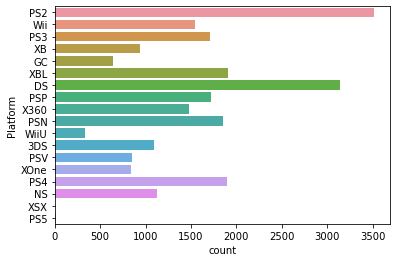

In [81]:
sns.countplot(data=vgsales_merged, y="Platform") # How many games in each platform on the DataFrame
plt.savefig("Count Plot for Platforms.png")

In [82]:
platform_sales = vgsales_merged.groupby("Platform")["Total_Sales"].sum()

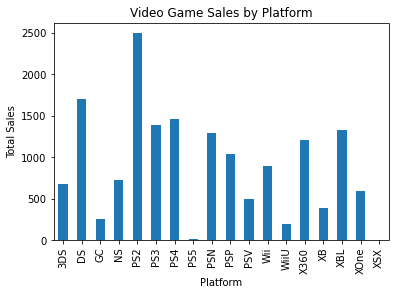

In [83]:
platform_sales.plot(kind="bar", ylabel="Total Sales", title="Video Game Sales by Platform")
plt.savefig("Video Game Sales by Platform.png")

In [84]:
vgsales_merged["Total_Sales"][vgsales_merged["Platform"] == "PS2"].sum()

2493.28

In [85]:
vgsales_merged["Total_Sales"][vgsales_merged["Platform"] == "DS"].sum()

1706.5900000000001

In [86]:
vgsales_merged["Total_Sales"][vgsales_merged["Platform"] == "X360"].sum()

1206.9

In [87]:
console_sales = console_sales.loc[["PlayStation 2 (PS2)", "PlayStation 3 (PS3)", "PlayStation 4 (PS4)", "PlayStation 5 (PS5)", "PlayStation Portable (PSP)", "PlayStation Vita (PSV)", "Xbox (XB)", "Xbox 360 (X360)", "Xbox One (XOne)", "Xbox Series X/S (XS)", "GameCube (GC)", "Nintendo DS (DS)", "Nintendo 3DS (3DS)", "Nintendo Switch (NS)", "Wii (Wii)", "Wii U (WiiU)"]]

In [88]:
console_sales = console_sales.reset_index()

In [89]:
for lab, row in console_sales.iterrows():
    if "PS" in str(row["Platform"]):
        console_sales.loc[lab, "Company"] = "Sony"
    elif "X" in str(row["Platform"]):
        console_sales.loc[lab, "Company"] = "Microsoft"
    else :
        console_sales.loc[lab, "Company"] = "Nintendo"

In [90]:
console_sales.head()

,Platform,North America,Europe,Japan,Rest of World,Global,Company
0,PlayStation 2 (PS2),53.65,55.28,23.18,25.57,157.68,Sony
1,PlayStation 3 (PS3),29.42,34.99,10.47,12.53,87.41,Sony
2,PlayStation 4 (PS4),38.14,48.09,9.36,19.99,115.58,Sony
3,PlayStation 5 (PS5),3.70,2.88,0.73,1.13,8.44,Sony
4,PlayStation Portable (PSP),21.41,24.41,20.01,15.26,81.09,Sony


In [91]:
company_sales = console_sales.groupby("Company")["Global"].sum()

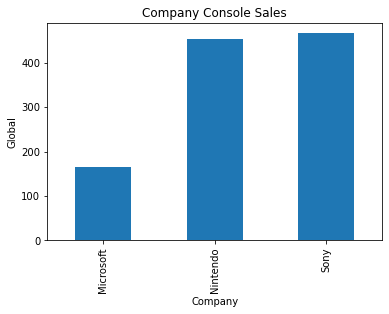

In [92]:
company_sales.plot(kind="bar", ylabel="Global", title="Company Console Sales")
plt.savefig("Company console sales.png")

Creating a DataFrame from a custom list of dictionaries on top platforms

In [93]:
cust_dict = {"Platform": ["PS2", "X360", "DS"], "Global Console Sales (millions)": [157.68, 85.80, 154.90], "Global Game Sales": [2493.28, 1706.59, 1206.9], "Total Sales": [2650.96, 1792.39, 1361.8]}

Creating Numpy array

In [94]:
console = [157.68, 85.80, 154.90]

In [95]:
games = [2493.28, 1706.59, 1206.9]

In [96]:
np_console = np.array(console)

In [97]:
np_games = np.array(games)

In [98]:
sum_sales = np_console + np_games

In [99]:
print(sum_sales)

[2650.96 1792.39 1361.8 ]


In [100]:
top_consoles = pd.DataFrame(cust_dict)

In [101]:
print(top_consoles)

  Platform  Global Console Sales (millions)  Global Game Sales  Total Sales
0      PS2                           157.68            2493.28      2650.96
1     X360                            85.80            1706.59      1792.39
2       DS                           154.90            1206.90      1361.80


In [102]:
top_consoles.set_index("Platform")

,Global Console Sales (millions),Global Game Sales,Total Sales
Platform,,,
PS2,157.68,2493.28,2650.96
X360,85.80,1706.59,1792.39
DS,154.90,1206.90,1361.80


Plot on critic scores vs total sales (and user scores as comparison)

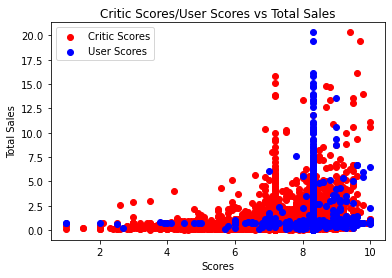

In [103]:
critic_scores = vgsales_merged["Critic_Score"]
user_scores = vgsales_merged["User_Score"]
fig, ax = plt.subplots()
ax.scatter(critic_scores, vgsales_merged["Total_Sales"], color="red", label="Critic Scores")
ax.scatter(user_scores, vgsales_merged["Total_Sales"], color="blue", label="User Scores")
ax.legend()
ax.set_xlabel("Scores")
ax.set_ylabel("Total Sales")
ax.set_title("Critic Scores/User Scores vs Total Sales")
plt.savefig("Sales by Critic Scores")

Genres vs total sales

In [104]:
Genre_sales = vgsales_merged.groupby("Genre")["Total_Sales"].sum()

In [105]:
print(Genre_sales)

Genre
Action              2423.23
Action-Adventure     329.24
Adventure           1445.46
Board Game             9.94
Education              1.09
Fighting             655.79
MMO                   21.89
Misc                2529.39
Music                120.44
Party                 37.73
Platform             756.46
Puzzle               779.29
Racing               888.67
Role-Playing        1310.73
Sandbox                3.99
Shooter             1704.34
Simulation           683.93
Sports              1804.35
Strategy             467.06
Visual Novel         185.62
Name: Total_Sales, dtype: float64


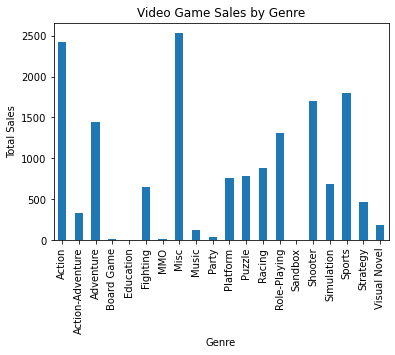

In [106]:
Genre_sales.plot(kind="bar", ylabel="Total Sales", title="Video Game Sales by Genre")
plt.savefig("Video game sales by genre.png", dpi=200)

Top publishers from top 100 games in the DataFrame

In [107]:
publishers = vgsales_merged.sort_values("Total_Sales", ascending=False)

In [108]:
publishers = publishers.iloc[:100, :]

In [109]:
publishers.head()

,Platform,Genre,Publisher,Critic_Score,User_Score,Total_Sales,NA_Sales,JP_Sales,EU_Sales,Other_Sales,Release_Date,Rating
Name,,,,,,,,,,,,
Grand Theft Auto V,PS3,Action,Rockstar Games,9.4,8.3,20.33,6.37,0.99,9.85,3.12,2013-09-17,M
Grand Theft Auto V,PS4,Action,Rockstar Games,9.7,8.3,19.39,6.06,0.60,9.71,3.02,2014-11-18,M
Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,9.6,8.3,16.15,8.41,0.47,5.49,1.78,2002-10-28,M
Grand Theft Auto V,X360,Action,Rockstar Games,7.2,8.3,15.87,9.06,0.06,5.33,1.42,2013-09-17,M
Call of Duty: Black Ops 3,PS4,Shooter,Activision,7.2,8.3,15.08,6.18,0.41,6.05,2.44,2015-06-11,Unknown


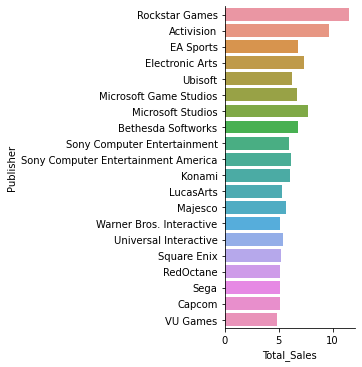

In [110]:
sns.catplot(x="Total_Sales", y="Publisher", data=publishers, kind='bar', ci=None)
plt.savefig("Top publishers.png")

Sales by video game age rating

In [111]:
rating_sales = vgsales_merged.groupby("Rating")["Total_Sales"].sum()

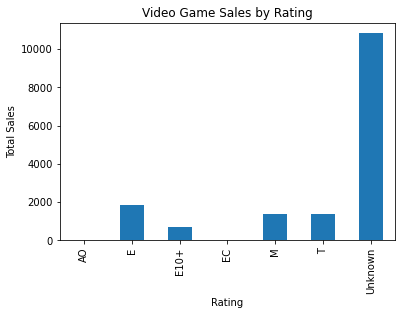

In [112]:
rating_sales.plot(kind="bar", ylabel="Total Sales", title="Video Game Sales by Rating")
plt.savefig("Sales by Game Rating.png")

Sales by Year

In [113]:
vg_year = vgsales_merged.reset_index()

In [114]:
vg_year = vg_year.set_index("Release_Date")

In [115]:
vg_year.head()

,Name,Platform,Genre,Publisher,Critic_Score,User_Score,Total_Sales,NA_Sales,JP_Sales,EU_Sales,Other_Sales,Rating
Release_Date,,,,,,,,,,,,
2000-02-11,G1 Jockey 2,PS2,Sports,KOEI,7.2,8.3,0.66,0.30,0.06,0.2,0.10,Unknown
2000-02-11,Dance Summit 2001: Bust A Move,PS2,Misc,Enix,7.2,8.3,0.70,0.30,0.10,0.2,0.10,Unknown
2000-02-11,BeatMania IIDX 3rd Style,PS2,Simulation,Konami,7.2,8.3,0.65,0.30,0.05,0.2,0.10,Unknown
2000-02-29,Q-Ball: Billiards Master,PS2,Sports,Take-Two Interactive,7.2,8.3,0.37,0.13,0.10,0.1,0.04,E
2000-03-08,Dream Audition,PS2,Misc,Jaleco,7.2,8.3,0.70,0.30,0.10,0.2,0.10,Unknown


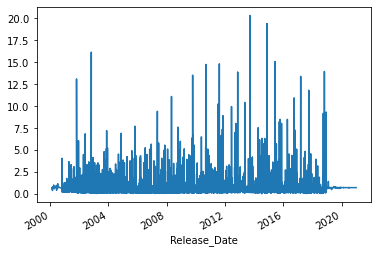

In [116]:
vg_year["Total_Sales"].plot()
plt.savefig("Total sales 2000-2020.png")

In [117]:
vg2012_2016 = vg_year.loc["2012":"2016"]

In [118]:
vg2012_2016.head()

,Name,Platform,Genre,Publisher,Critic_Score,User_Score,Total_Sales,NA_Sales,JP_Sales,EU_Sales,Other_Sales,Rating
Release_Date,,,,,,,,,,,,
2012-01-02,Double Fine Happy Action Theater,XBL,Misc,Microsoft Studios,7.2,8.3,0.70,0.3,0.10,0.2,0.1,Unknown
2012-01-03,Aahh! Spot the Difference,3DS,Misc,Gamelion Studios,7.2,8.3,0.70,0.3,0.10,0.2,0.1,Unknown
2012-01-03,Doraemon: Nobita and the Island of Miracles,3DS,Adventure,FuRyu Corporation,7.2,8.3,0.68,0.3,0.08,0.2,0.1,Unknown
2012-01-03,Great Battle Full Blast,PSP,Fighting,Namco Bandai Games,7.2,8.3,0.64,0.3,0.04,0.2,0.1,Unknown
2012-01-05,Awesomenauts,PSN,Platform,DTP Entertainment,7.2,8.3,0.70,0.3,0.10,0.2,0.1,Unknown


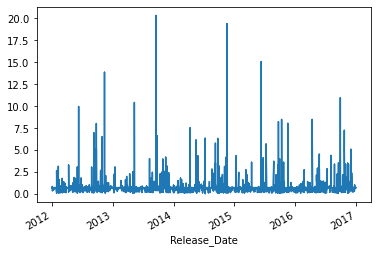

In [119]:
vg2012_2016["Total_Sales"].plot()
plt.savefig("Total sales 2012-2016.png")

In [120]:
vg2013_2015 = vg_year.loc["2013":"2015"]

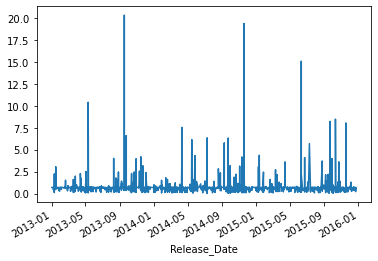

In [121]:
vg2013_2015["Total_Sales"].plot()
plt.savefig("Total sales 2013-2015.png")

In [122]:
vg2013 = vg_year.loc["2013"]

In [123]:
vg2013 = vg2013.reset_index()

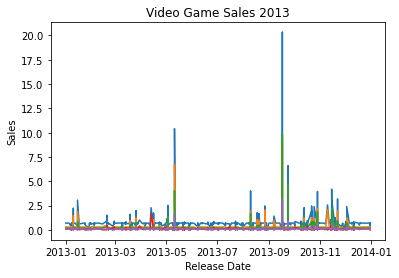

In [124]:
fig, ax = plt.subplots()
ax.plot(vg2013["Release_Date"], vg2013["Total_Sales"])
ax.plot(vg2013["Release_Date"], vg2013["NA_Sales"])
ax.plot(vg2013["Release_Date"], vg2013["EU_Sales"])
ax.plot(vg2013["Release_Date"], vg2013["JP_Sales"])
ax.plot(vg2013["Release_Date"], vg2013["Other_Sales"])
ax.set_xlabel("Release Date")
ax.set_ylabel("Sales")
ax.set_title("Video Game Sales 2013")
plt.savefig("Video Game Sales 2013.png")